In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [26]:
df = pd.read_csv("income(1).csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


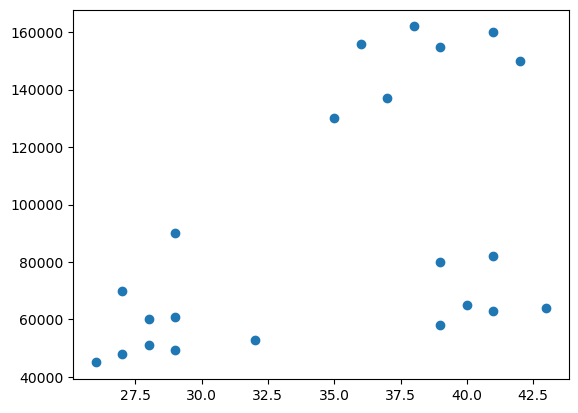

In [5]:
plt.scatter(df.Age, df['Income($)'])

In [32]:
means = KMeans(n_clusters = 3)
y_predict = means.fit_predict(df[['Age', 'Income($)']])
df['cluster'] = y_predict

/Users/spaceconsole/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


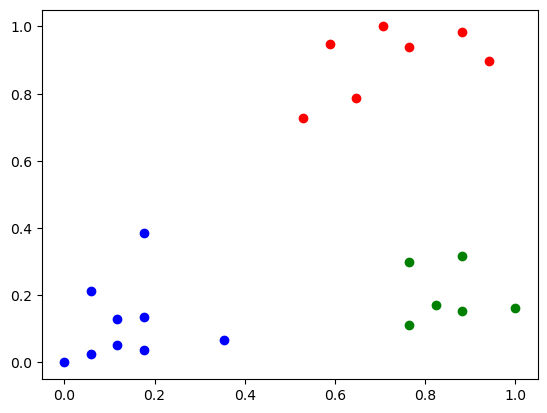

In [33]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1['Age'], df1['Income($)'], c = 'b')
plt.scatter(df2['Age'], df2['Income($)'], c = 'g')
plt.scatter(df3['Age'], df3['Income($)'], c = 'r')

In [27]:
scaler = MinMaxScaler()
scaler.fit(df['Income($)'].values.reshape(-1, 1))
df['Income($)'] = scaler.transform(df['Income($)'].values.reshape(-1, 1))

In [28]:
scaler.fit(df['Age'].values.reshape(-1, 1))
df['Age'] = scaler.transform(df['Age'].values.reshape(-1, 1))

In [30]:
print(df)

        Name       Age  Income($)
0        Rob  0.058824   0.213675
1    Michael  0.176471   0.384615
2      Mohan  0.176471   0.136752
3     Ismail  0.117647   0.128205
4       Kory  0.941176   0.897436
5     Gautam  0.764706   0.940171
6      David  0.882353   0.982906
7     Andrea  0.705882   1.000000
8       Brad  0.588235   0.948718
9   Angelina  0.529412   0.726496
10    Donald  0.647059   0.786325
11       Tom  0.000000   0.000000
12    Arnold  0.058824   0.025641
13     Jared  0.117647   0.051282
14     Stark  0.176471   0.038462
15    Ranbir  0.352941   0.068376
16    Dipika  0.823529   0.170940
17  Priyanka  0.882353   0.153846
18      Nick  1.000000   0.162393
19      Alia  0.764706   0.299145
20       Sid  0.882353   0.316239
21     Abdul  0.764706   0.111111


In [41]:
y_predicted = means.fit_predict(df[['Age', 'Income($)']])
df['clusters'] = y_predicted

/Users/spaceconsole/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


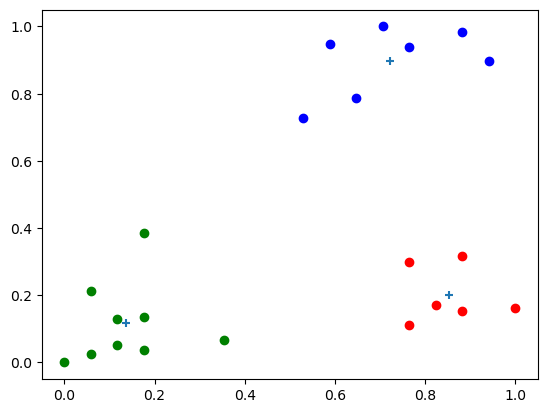

In [61]:
df1 = df[df.clusters == 0]
df2 = df[df.clusters == 1]
df3 = df[df.clusters == 2]
plt.scatter(df1['Age'], df1['Income($)'], c = 'b')
plt.scatter(df2['Age'], df2['Income($)'], c = 'g')
plt.scatter(df3['Age'], df3['Income($)'], c = 'r')
plt.scatter(means.cluster_centers_[:, 0], means.cluster_centers_[:, 1], marker = '+')

In [64]:
sse = []
for k in range(1, 10):
    mean = KMeans(n_clusters = k)
    mean.fit(df[['Age', 'Income($)']])
    sse.append(mean.inertia_)

/Users/spaceconsole/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/spaceconsole/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/spaceconsole/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/spaceconsole/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

Text(0, 0.5, 'Sum of Squared error')

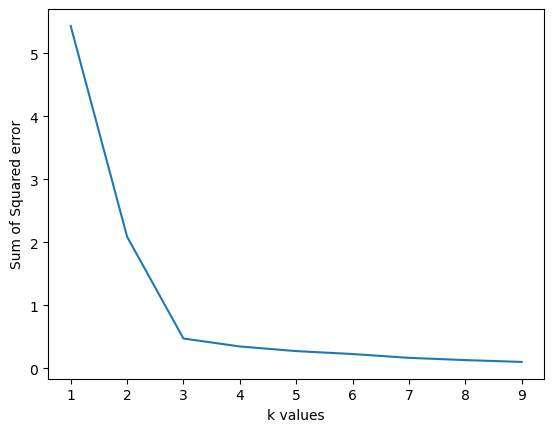

In [67]:
plt.plot(range(1, 10), sse)
plt.xlabel('k values')
plt.ylabel('Sum of Squared error')